# ETL.

ETL stands for "extract, transform, load" and it is exactly what it does. In our case the ETL takes the raw-data, which has been collected using the cell-phones out in the field, and transforms it in a way that makes Data Science easier. In regular intervals the ETL takes generates snapshots of the entire data and stores them in a folder with a timestamp.

In [1]:
# This makes sure that you got access to the cgmcore-module
import sys
sys.path.insert(0, "..")

# ETL-Data-Generator.

Data-generators are a core concept of Keras (https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly). They allow for data-generation on the fly. This includes but is not limited to data-augmentation and data-preprocessing.

Throughout the project we make extensive use of data-generators. The ETL-Data-Generator works explicitly on the data as provided by the ETL.

# Accessing the latest dataset.

We provide means to retrieve the latest data-set-path as follows.

In [2]:
from cgmcore.etldatagenerator import get_dataset_path

dataset_path = get_dataset_path("/whhdata/person")
print("Using daataset-path {}.".format(dataset_path))

Using daataset-path /whhdata/person/MH_WHH_1037.


# Finding all PCD-files.

In [3]:
import glob2 as glob
import os

all_pcd_paths = glob.glob(os.path.join(dataset_path, "**/*.pcd"))
print("Found {} PCD-files.".format(len(all_pcd_paths)))

Found 5 PCD-files.


# Selecting a random PCD-file.

In [4]:
import random
random_pcd_path = random.choice(all_pcd_paths)
print("Using random PCD-path {}.".format(random_pcd_path))

Using random PCD-path /whhdata/person/MH_WHH_1037/measurements/1543403655009/pc/pc_MH_WHH_1037_1543403655009_104_001.pcd.


# Loading the pointcloud as a numpy array.

This is one of the many helper-functions provided by cgmcore.utils.

In [5]:
from cgmcore.utils import load_pcd_as_ndarray

pointcloud = load_pcd_as_ndarray(random_pcd_path)
print("Loaded pointcloud with shape {}.".format(pointcloud.shape))

Loaded pointcloud with shape (37020, 4).


# Rendering a pointcloud.

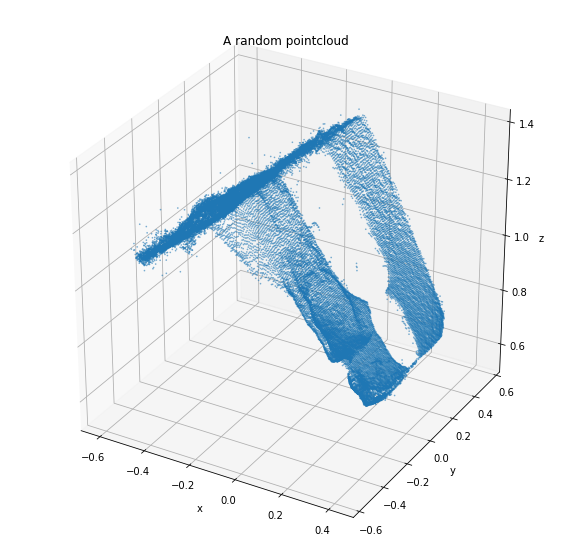

In [6]:
from cgmcore.utils import render_pointcloud

render_pointcloud(pointcloud, "A random pointcloud")